In [ ]:
!pip install allennlp
!pip install spacy
!pip install --pre allennlp-models
import allennlp_models
from allennlp.models.archival import load_archive
from allennlp.predictors.predictor import Predictor
from nltk.tree import *
from nltk.corpus import treebank
import numpy as np
from graphviz import Digraph
import sys
from allennlp.predictors.predictor import Predictor
import allennlp_models.structured_prediction
import nltk
import time
consti_parser = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/elmo-constituency-parser-2020.02.10.tar.gz")
from IPython.display import display
nltk.download('treebank')


     |████████████████████████████████| 512kB 11.9MB/s 
     |████████████████████████████████| 1.3MB 29.1MB/s 
     |████████████████████████████████| 133kB 19.6MB/s 
     |████████████████████████████████| 266kB 26.3MB/s 
     |████████████████████████████████| 317kB 48.0MB/s 
     |████████████████████████████████| 2.9MB 34.8MB/s 
     |████████████████████████████████| 890kB 47.9MB/s 
     |████████████████████████████████| 1.1MB 47.2MB/s 
     |████████████████████████████████| 71kB 5.2MB/s 
     |████████████████████████████████| 6.8MB 42.1MB/s 
  Created wheel for overrides: filename=overrides-3.1.0-cp36-none-any.whl size=10174 sha256=fdc37bb8a9c26c26d00ff0a9f7aab0374f3c7cccf1408209fc9e77b90172bb96
  Stored in directory: /root/.cache/pip/wheels/5c/24/13/6ef8600e6f147c95e595f1289a86a3cc82ed65df57582c65a9
  Created wheel for jsonnet: filename=jsonnet-0.16.0-cp36-cp36m-linux_x86_64.whl size=3321466 sha256=7e7bf6605ec85fc7a1742c514175afffe41c287973203ca9d93d00b334ce7e9b
  Stored in 

downloading: 100%|##########| 374434792/374434792 [00:28<00:00, 13292692.81B/s]
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:434: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [ ]:
from allennlp.predictors.predictor import Predictor
import allennlp_models.structured_prediction
import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph

dp_parser = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/biaffine-dependency-parser-ptb-2020.04.06.tar.gz")
def gt(sen):

  dp = dp_parser.predict(
    sentence=sen
  )
  ground_truth_dp = Digraph('dependency_graph')
  ground_truth_dp.attr('node', shape='plaintext')
  init_token_list = sen.split()
  for token in init_token_list:
      ground_truth_dp.node(token)
  aa = dp["hierplane_tree"]
  dic = aa["root"]
  flag=1
  def grapher(dic):
    if "children" in dic.keys():
      for i in range(len(dic["children"])):
        ground_truth_dp.edge(dic["word"], dic["children"][i]["word"], label=dic["children"][i]["nodeType"])
      for i in range(len(dic["children"])):
        grapher(dic["children"][i])


  grapher(dic)
  display(ground_truth_dp)


downloading: 100%|##########| 73220444/73220444 [00:03<00:00, 20076652.64B/s]


In [ ]:

Rules = {}
Rules["VB CC VB"] = [[0],[[0, 1, 'cc'],[0, 2, 'conj']]]
Rules["VBP NP"] = [[0],[[0, 1, 'dobj']]]
Rules["VBP S SBAR"] = [[0],[[0, 1, 'xcomp'],[0, 2, 'dep']]]
Rules["VBG NP"] = [[0],[[0, 1, 'dobj']]]
Rules["NNP NNP"] = [[0],[[0, 1, 'dobj']]]
Rules["NP JJ"] = [[1],[[1, 0, 'npadvmod']]]
Rules["CD NNS"] = [[1],[[1, 0, 'num']]]
Rules["NP ADJP"] = [[0],[[0, 1, 'amod']]]
Rules["DT NN"] = [[1],[[1, 0, 'det']]]
Rules["DT JJ NN"] = [[2],[[2, 1, 'amod'],[2, 0, 'det']]]
Rules["DT JJ JJ NN"] = [[3],[[3, 1, 'amod'],[3, 0, 'det'],[3, 2, 'amod']]]
Rules["NNP CD"] = [[0],[[0, 1, 'num']]]
Rules["IN NP"] = [[0],[[0, 1, 'pobj']]]
Rules["VB NP PP NP"] = [[0],[[0, 1, 'pobj'], [0, 2, 'prep'], [0, 3, 'tmod']]]
Rules["MD VP"] = [[1],[[1, 0, 'aux']]]
Rules["VBZ VP"] = [[1],[[1, 0, 'aux']]]
Rules["VBP VP"] = [[1],[[1, 0, 'aux']]]
Rules["VBZ NP"] = [[0],[[0, 1, 'dobj']]]
Rules["JJ NNS"] = [[1],[[1, 0, 'amod']]]
Rules["VB NP"] = [[0],[[0, 1, 'dboj']]]
Rules["NP VP"] = [[1],[[1, 0, 'nsubj']]]
Rules["DT JJ NN NN"] = [[3],[[3, 0, 'det'], [3, 1, 'amod'], [3, 2, 'amod']]]
Rules["NP NP"] = [[0],[[0, 1, 'nmod']]]
Rules["PP NP"] = [[0],[[0, 1, 'pobj']]]
Rules["VBD NP"] = [[0],[[0, 1, 'dobj']]]
Rules["TO VP"] = [[1],[[1, 0, 'aux']]]
Rules["VBP S"] = [[0],[[0, 1, 'xcomp']]]
Rules["DT NNS"] = [[1],[[1, 0, 'det']]]
Rules["DT NNP"] = [[1],[[1, 0, 'det']]]
Rules["VBD PP"] = [[0],[[0, 1, 'prep']]]
Rules["VBZ ADVP"] = [[0],[[0, 1, 'advmod']]]
Rules["NP ADVP VP"] = [[2],[[2, 0, 'nsubj'],[2, 1, 'aux']]]


def cptodp(sentence):
    tree = consti_parser.predict(sentence)['trees']
    main_tree = ParentedTree.fromstring(tree)
    
    dp_conv = Digraph('dependency_graph')
    dp_conv.attr('node', shape='plaintext')
    start = main_tree.leaves()
    for word in start:
        dp_conv.node(word)
    print("Constituent Tree")
    main_tree.pretty_print()
    if main_tree.height() >= 3:
        while (main_tree.height() >= 3):

            tree_sub = main_tree.subtrees(lambda main_tree: main_tree.height() == 3)
            for graph in tree_sub:
                tags = []
                for i in range(len(graph)):
                  tags.append(graph[i].label())
               
                tags = " ".join(tags)
              
                Leaf_list = graph.leaves()

                Converted = [[],[]]
                if tags in Rules.keys():
                  Converted = Rules[tags]
                else:
                  Converted[0].append(0)
                  for j in range(len(tags.split())-1):
                    Converted[1].append([0, j +1, 'R'])
                if(len(Converted)>1):  
                  for i in range(len(Converted[1])):
                      connection = Converted[1][i]
                      dp_conv.edge(Leaf_list[connection[0]], Leaf_list[connection[1]], label=connection[2])
                
                Graph_update = '({} {})'
                Graph_update =  Graph_update.format(graph.label(), Leaf_list[Converted[0][0]]) 
                place = graph.treeposition()
                if len(place) != 0:
                    main_tree[place] = ParentedTree.fromstring(Graph_update)
                else:
                    main_tree = ParentedTree.fromstring(Graph_update)
                   
    return dp_conv 
    

Constituent Tree
            S                    
      ______|_________            
     |                VP         
     |             ___|___        
     NP           |       NP     
  ___|______      |    ___|___    
 DT  JJ     NN   VBD  DT      NN 
 |   |      |     |   |       |   
The fast athlete won the     race

Ours


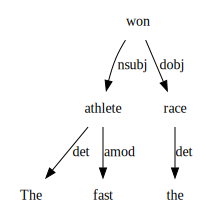

Allen Parser


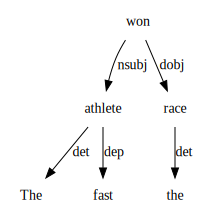

In [ ]:
sen = 'The fast athlete won the race'

dp_conv = cptodp(sen)

print("Ours")
display(dp_conv)
print("Allen Parser")
gt(sen)

In [ ]:
# Three people laughed always
# I play football
# I like to drink
# Car is running fast
# India is best country
# We work hard
# I trust you
# Winners never make excuse
# You helped me
# Strive for excellence

In [ ]:
# I like to sing and dance
# Fast dog caught the person
# The quick brown fox jumps over the lazy dog
# Big vehicles block the city road
# I am testing the accuracy of parse tree
# Blunders have occured when we are careless
# I pretend to laugh always
# It is a sunny day and I was sleeping
# There was a jaguar behind the car
# The fast athlete won the race


